In [17]:
import re
import sys
import os
import numpy as np
from scipy.spatial.transform import Rotation as R
from matplotlib import pyplot as plt
from ase import Atoms
from ase.build import fcc111, add_adsorbate
from ase.visualize.plot import plot_atoms
from ase.io import read, write
from ase.optimize import BFGS
from ase.constraints import FixAtoms
from mace.calculators import MACECalculator

import torch

In [23]:
def optimize_structure(atoms, calculator):
    """
    Runs structure optimization with BFGS until forces < 0.01 eV/Å.
    """
    atoms.set_calculator(calculator)
    dyn = BFGS(atoms)
    dyn.run(fmax=0.01)
    return atoms

In [22]:
model_path = "../../models/MAD-SURF.model"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

calculator = MACECalculator(model_paths=model_path, device=str(device),      default_dtype="float32", cu_equivariance=False)

Using device: cuda
Using head Default out of ['pt_head', 'Default']
Default dtype float32 does not match model dtype float64, converting models to float32.


/home/manu/anaconda3/envs/mace_env/lib/python3.9/site-packages/mace/calculators/mace.py:197: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


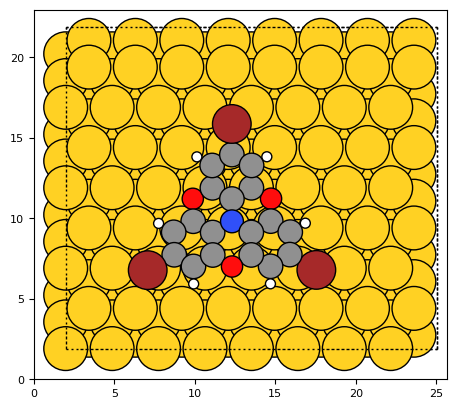

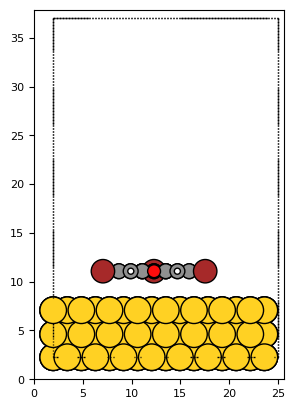

In [28]:
surface = read("surface_geom/CONTCAR")
molecule = read("molecule_geom/CONTCAR")

system = surface.copy()
cell_center = 0.5 * (system.get_cell()[0] + system.get_cell()[1])[:2]
add_adsorbate(system, molecule, height=4.0, position=cell_center)
plot_atoms(system)
plt.show()
plt.close()
plot_atoms(system, rotation='-90x,0y,0z')
plt.show()
plt.close()

In [29]:
optimized_system = optimize_structure(system.copy(), calculator)

      Step     Time          Energy          fmax
BFGS:    0 15:33:23 -103086136.000000        0.575678


/tmp/ipykernel_36618/3838449106.py:5: DeprecationWarning: Please use atoms.calc = calc
  atoms.set_calculator(calculator)


BFGS:    1 15:33:23 -103086136.000000        0.276126
BFGS:    2 15:33:23 -103086136.000000        0.131074
BFGS:    3 15:33:23 -103086136.000000        0.123140
BFGS:    4 15:33:24 -103086136.000000        0.100389
BFGS:    5 15:33:24 -103086136.000000        0.096728
BFGS:    6 15:33:24 -103086136.000000        0.097171
BFGS:    7 15:33:24 -103086136.000000        0.115065
BFGS:    8 15:33:25 -103086136.000000        0.118415
BFGS:    9 15:33:25 -103086136.000000        0.130396
BFGS:   10 15:33:25 -103086136.000000        0.209824
BFGS:   11 15:33:25 -103086136.000000        0.271497
BFGS:   12 15:33:26 -103086136.000000        0.265608
BFGS:   13 15:33:26 -103086136.000000        0.171746
BFGS:   14 15:33:26 -103086136.000000        0.135840
BFGS:   15 15:33:26 -103086136.000000        0.116609
BFGS:   16 15:33:27 -103086136.000000        0.163904
BFGS:   17 15:33:27 -103086136.000000        0.138234
BFGS:   18 15:33:27 -103086136.000000        0.089487
BFGS:   19 15:33:27 -1030861

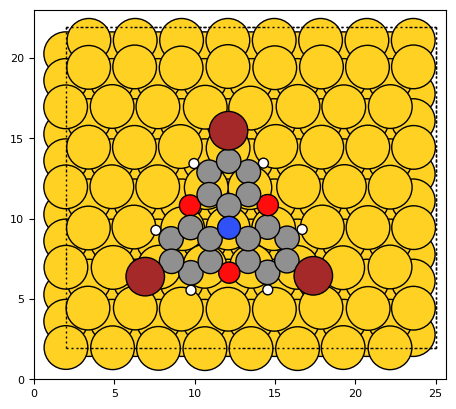

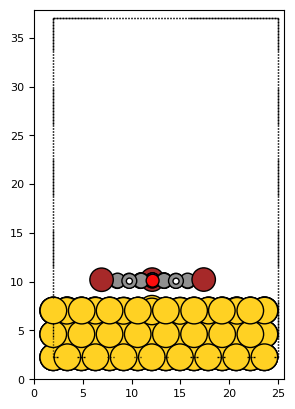

In [30]:
plot_atoms(optimized_system)
plt.show()
plt.close()
plot_atoms(optimized_system, rotation='-90x,0y,0z')
plt.show()
plt.close()


In [32]:
# print the mean adsorption height after optimization and the height of the Nitrogen atom with respect to the surface
surface_z = surface.get_positions()[:, 2].max()
adsorbate_positions = optimized_system.get_positions()[len(surface):]
mean_adsorption_height = np.mean(adsorbate_positions[:, 2] - surface_z)
print(f"Mean adsorption height: {mean_adsorption_height:.3f} Å")


Mean adsorption height: 3.029 Å
